In [80]:
# load binary file
import numpy as np
from scipy.ndimage import filters
from scipy.ndimage import gaussian_filter
import scipy.sparse as sparse
import time
import matplotlib.pyplot as plt
import math
import scipy.io as sio
%matplotlib inline

def tic():
    return(time.time())
def toc(t0):
    return(time.time()-t0)

ops0 = sio.loadmat('/media/carsen/DATA1/2P/F/M150329_MP009/2015-04-29/2_4_5_6/regops_M150329_MP009_2015-04-29.mat')

In [78]:
ops1 = ops0['ops1']

print(ops1[0])

[array([[(array(['C:\\GitHub\\Suite2P'], dtype='<U17'), array([[0]], dtype=uint8), array(['//zserver.cortexlab.net/Data/Subjects/'], dtype='<U38'), array(['//zserver.cortexlab.net/Data/expInfo'], dtype='<U36'), array(['F:/DATA/temp.tif'], dtype='<U16'), array(['F:/DATA/BIN/'], dtype='<U12'), array([[0]], dtype=uint8), array(['D:/DATA/F//M150329_MP009//2015-04-29//2_4_5_6//'], dtype='<U47'), array([], shape=(0, 0), dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[inf]]), array([[500]], dtype=uint16), array([[0]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[1]], dtype=uint8), array([[0.5]]), array([[1000]], dtype=uint16), array([[5000]], dtype=uint16), array(['surround'], dtype='<U8'), array([[1]], dtype=uint8), array([[inf]]), array([[400]], dtype=uint16), array([[5]], dtype=uint8), array([[29.9829]]), array([[2]], dtype=uint8), array([[1]], dtype=uint8), array([[1.45]]), array([[1]], dtype=uint8), arr

In [88]:
ops = {
        'reg_file': '/media/carsen/SSD/BIN/M150329_MP009_2015-04-29_2_4_5_6_plane1.bin',
        'Ly': 499,
        'Lx': 494,
        'ny': 512,
        'nx': 512,
        'navg_frames_svd': 5000,
        'nsvd_for_roi': 1000,
        'ratio_neuropil': 6,
        'tile_factor': 1,
        'diameter': 12,
        'threshold_scaling': 1,
        'Vcorr': [],
        'yrange': np.arange(7,506),
        'xrange': np.arange(9,503)
    }

ntotframes = 153187.0
nt0 = np.ceil(ntotframes / ops['navg_frames_svd']);
nt0 = int(nt0)
print(nt0)
nimgbatch = nt0 * int(np.floor(2000/nt0));
print(nimgbatch)

31
1984


In [89]:
# load and bin data

mov = np.zeros((ops['navg_frames_svd'], ops['Ly'], ops['Lx']), np.float32)

Ly = ops['Ly']
Lx = ops['Lx']
ny = ops['ny']
nx = ops['nx']

block_size = ny*nx*nimgbatch*2
reg_file = open(ops['reg_file'], 'rb')
nimgbatch = int(nimgbatch)
ix = 0
with open(ops['reg_file'], 'rb') as reg_file:
    buff = reg_file.read(ny*nx*nimgbatch*2)
    while buff != '':
        ## FIX LAST FRAME ISSUE !!!
        buff = reg_file.read(block_size)
        data = np.frombuffer(buff, dtype=np.int16, offset=0)
        nimgd = int(np.floor(data.size / (ny*nx)))
        data = np.reshape(data.astype(np.float32), (ny,nx,nimgd), order='F')
        data = np.transpose(data, (2,0,1))
        # subtract mean of batch
        data = data - data.mean(axis=0)
        # bin data
        nmax = int(np.floor(nimgd / nt0) * nt0)
        dbin = np.reshape(data[:nmax,:,:], (nt0,-1,ny,nx))
        dbin = np.squeeze(dbin.mean(axis=0))
        inds = ix + np.arange(0,dbin.shape[0])
        # crop into valid area
        mov[inds,:,:] = dbin[:, ops['yrange'][0]:ops['yrange'][-1]+1, ops['xrange'][0]:ops['xrange'][-1]+1]
        ix += dbin.shape[0]

mov = np.reshape(mov, (mov.shape[0],Ly*Lx))

(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 512)
(5000, 499, 494)
(1984, 512, 51

ValueError: cannot reshape array of size 109838336 into shape (31,newaxis,512,512)

In [90]:
mov = np.reshape(mov, (mov.shape[0],Ly*Lx))

In [91]:
### take SVDs of data
print(mov.shape)
# compute noise variance across frames (assumes slow signal)
sdmov = np.mean(np.diff(mov)**2)**.5
sdmov = max(1e-10,sdmov)
# normalize pixels by noise variance
mov = mov / sdmov

(5000, 246506)


In [120]:
import celldetect
import imp
imp.reload(celldetect)
S = celldetect.getNeuropilBasis(ops, Ly, Lx)

In [144]:
# compute covariance of binned frames
cov = (mov @ np.transpose(mov)) / mov.shape[1]

nsvd_for_roi = min(ops['nsvd_for_roi'], cov.shape[0]-2)
# compute svd of covariance
t0=tic()
u, s, v = np.linalg.svd(cov)
print(toc(t0))
u = u[:, :nsvd_for_roi]
U = u.transpose() @ mov

## we will return U, sdmov
nsvd = U.shape[0]

# compute covariance of neuropil masks with spatial masks
StU = S @ U.transpose()
StS = S @ S.transpose()

U = np.reshape(U, (nsvd,Ly,Lx))

9.519426345825195


In [332]:


d0 = ops['diameter']
sig = np.ceil(d0 / 4) # smoothing constant

# make array of radii values of size (2*d0+1,2*d0+1)
rs,dy,dx     = celldetect.circleMask(2*d0)
rsmall,dy,dx = celldetect.circleMask(d0)

ncell = int(1e4)
mPix = -1*np.ones((dx.size, ncell), np.int32)
mLam = np.zeros((dx.size, ncell), np.float32)

it = 0

ncells = 0
r = np.random.random((ncell,))

L = sparse.lil_matrix((1,Ly*Lx), dtype=np.float32)
nsvd = U.shape[0]
nbasis = S.shape[0]
LtU = np.zeros((0,nsvd), np.float32)
LtS = np.zeros((0,nbasis), np.float32)

# regress maps onto basis functions and subtract neuropil contribution
# U = Ucell + neu'*S'
# neu = inv(S'*S) * (S'*U')

neu = np.linalg.solve(StS, StU)
Ucell = U - np.reshape(neu.transpose() @ S, U.shape)


In [102]:
print(Ucell.shape)

(1000, 499, 494)


0.6452350432361444


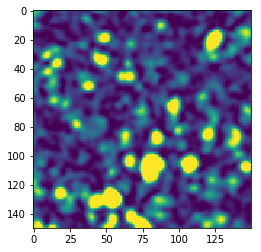

0.6426752360895512 23.23013162612915


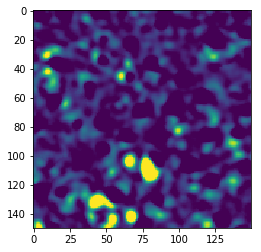

0.6408866362424206 30.17514991760254


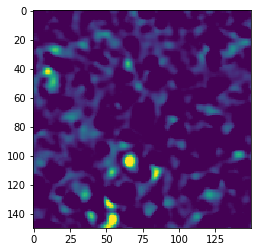

0.6398033717455194 33.47699046134949


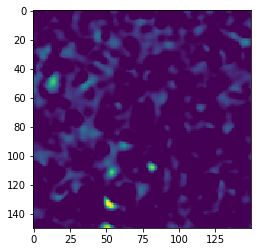

0.6392893445302702 34.27591609954834


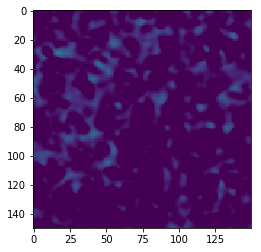

0.639115045908578 34.27616572380066


In [333]:
def sub2ind(array_shape, rows, cols):
    inds = rows * array_shape[1] + cols
    return inds

err = (Ucell**2).mean()
print(err)
it = 0
while it<5:
    # smooth residual
    t0 = tic()
    us = gaussian_filter(Ucell, [0., sig, sig],  mode='wrap')
    
    # compute log variance at each location
    V = (us**2).mean(axis=0)
    um = (Ucell**2).mean(axis=0)
    um = gaussian_filter(um, [sig, sig],  mode='wrap')
    V  = V / um
    
    if it==0:
        # perform morphological opening on V to normalize brightness
        vrem   = celldetect.morphOpen(V, rs<=d0)
        V      = V - vrem
        # find indices of all maxima in +/- 1 range
        # use the median of these peaks to decide stopping criterion
        maxV   = filters.maximum_filter(V, footprint= rs<=1)
        imax   = V > (maxV - 1e-10)
        peaks  = V[imax]
        thres  = ops['threshold_scaling'] * np.median(peaks[peaks>1e-4])
        ops['Vcorr'] = V
    else:
        V = V - vrem
        # in case this exceeds original value
        V = np.minimum(V, ops['Vcorr'])
    
    plt.imshow(V[:150,:150],vmin=0,vmax=0.005)
    plt.show()
        
    # find local maxima in a +/- d0 neighborhood
    i,j  = celldetect.localMax(V, rs<=d0, thres)
    if i.size==0:
        break
    
    # svd values of cell peaks
    new_codes = us[:,i,j]
    new_codes = new_codes / np.sum(new_codes**2, axis=0)**0.5
    
    for n in range(ncells, ncells+new_codes.shape[1]):
        ypix, xpix, goodi = celldetect.localRegion(i[n-ncells],j[n-ncells],dy,dx,Ly,Lx)
        # weights of svds surrounding max projected onto peak weights
        usub = Ucell[:, ypix, xpix]
        lam = np.maximum(0, new_codes[:,n-ncells].transpose() @ usub)
        lam[lam<lam.max()/5] = 0
        ipix = sub2ind((Ly,Lx), ypix, xpix)
        n0 = n*np.ones((goodi.sum(),),np.int32)
        mPix[goodi,n0] = ipix
        #print((mPix[:,n]>0).sum())
        mLam[goodi,n0] = lam
        # get connected region
        mLam[:,n] = celldetect.connectedRegion(mLam[:,n], rsmall, d0)
        mLam[:,n] = mLam[:,n] / np.sum(mLam[:,n]**2)**0.5
        # save lam in L, LtU, and LtS
        lam  = mLam[goodi,n]
        lam0 = np.zeros((1,Ly*Lx),np.float32)
        lam0[0,ipix] = lam
        if n>0:
            L = sparse.vstack([L, lam0])
        else:
            L[0,:] = lam0
        lam = np.expand_dims(lam,axis=0)
        LtU = np.append(LtU, lam @ np.resize(U[:,ypix,xpix], (nsvd,ypix.size)).transpose(), axis=0)
        LtS = np.append(LtS, lam @ S[:,ipix].transpose(), axis=0)
    
    ncells += new_codes.shape[1]

    
    # regression with neuropil
    L = sparse.csr_matrix(L)
    LtL = (L @ L.transpose()).toarray()
    cellcode = np.concatenate((LtL,LtS), axis=1)
    neucode  = np.concatenate((LtS.transpose(),StS), axis=1)
    codes = np.concatenate((cellcode, neucode), axis=0)
    Ucode = np.concatenate((LtU, StU),axis=0)
    codes = np.linalg.solve(codes + 1e-3*np.eye((codes.shape[0])), Ucode)
    neu   = codes[ncells:,:]
    codes = codes[:ncells,:]

    Ucell = U - np.resize(neu.transpose() @ S, U.shape) - np.resize(codes.transpose() @ L, U.shape)
    
    # reestimate masks
    L = sparse.lil_matrix((ncells,Ly*Lx),dtype=np.float32)
    #L = sparse.csr_matrix((Ly*Lx,ncells), dtype=np.float32)
    for n in range(0,ncells):
        goodi   = np.array((mPix[:,n]>=0).nonzero()).astype(np.int32)
        goodi   = goodi.flatten()
        n0      = n*np.ones(goodi.shape,np.int32)
        ipix    = mPix[goodi,n0].astype(np.int32)
        ypix,xpix = np.unravel_index(ipix.astype(np.int32), (Ly,Lx))
        usub    = (np.resize(Ucell[:,ypix,xpix],(nsvd,goodi.size)) 
                 + np.expand_dims(codes[n,:],axis=-1) @ np.expand_dims(mLam[goodi,n0],axis=0))
           
        lam = np.maximum(0, codes[n,:] @ usub)
        lam[lam<lam.max()/5] = 0
        mLam[goodi,n0] = lam
        mLam[:,n]  = celldetect.connectedRegion(mLam[:,n], rsmall, d0)
        mLam[:,n]  = mLam[:,n] / np.sum(mLam[:,n]**2)**0.5
        # save lam in L, LtU, and LtS
        lam = mLam[goodi,n]
        lam0 = np.zeros((1,Ly*Lx),np.float32)
        lam0[0,ipix] = lam
        #if n>0:
        #    L = sparse.hstack([L, lam0])
        #else:
        #    L[:,0] = lam0
        L[n,:] = lam0
        lam = np.expand_dims(lam,axis=0)
        LtU[n,:]  = lam @ np.resize(U[:,ypix,xpix], (nsvd,ypix.size)).transpose()
        LtS[n,:]  = lam @ S[:,ipix].transpose()
         
        Ucell[:,ypix,xpix] = usub - (usub @ lam.transpose()) @ lam
        
    #plt.imshow(np.sum(Ucell[:,:150,:150]**2, axis=0)**.5)
    #plt.show()
    err = (Ucell**2).mean()
    print(err, toc(t0))
    
    
    
    if it==0:
        Nfirst = i.size
    
    
    
    
    it += 1
    
    

In [325]:
lam0 = np.zeros((1,Ly*Lx),np.float32)
lam0[0,ipix] = lam
        

print(new_codes.shape)
print(L.shape)
print(lam0.shape)
print(goodi.shape)

(1000, 369)
(1, 246506)
(1, 246506)
(441,)


In [115]:
mout = celldetect.connectedRegion(mLam[:,n], rsmall, d0)
print(mout.shape)
        

ValueError: NumPy boolean array indexing assignment cannot assign 441 input values to the 625 output values where the mask is true

In [259]:
a=np.array([[1,2,3],[4,5,6]])
print(a.flatten())
    


[1 2 3 4 5 6]


(369, 369) (369, 196)
(369, 1000) (196, 1000)


In [217]:
us = gaussian_filter(Ucell, [0., sig, sig],  mode='wrap')
# compute log variance at each location
V = (us**2).mean(axis=0)
um = (Ucell**2).mean(axis=0)
um = gaussian_filter(um, [sig, sig],  mode='wrap')
V  = V / um
V  = V - vrem

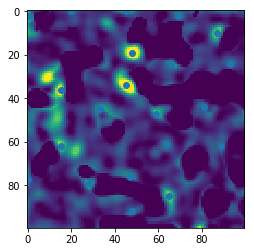

3.0


In [250]:
#plt.imshow((Ucell[:,:100,:100]**2).mean(axis=0))
plt.imshow(V[:100,:100],vmin=0,vmax=0.005)
plt.plot(j[(i<100) & (j<100)],i[(i<100) & (j<100)],'o')
plt.show()
print(sig)

0


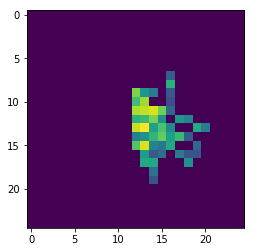

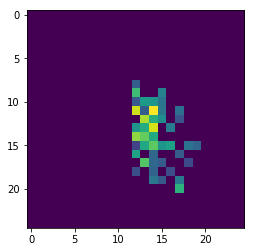

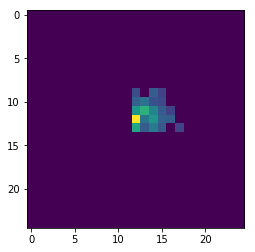

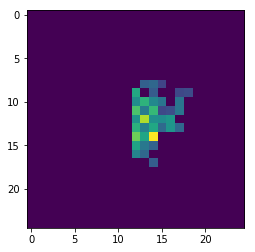

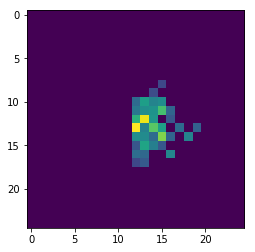

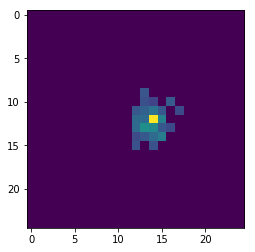

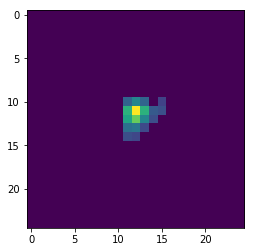

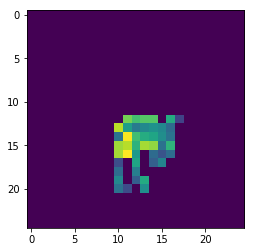

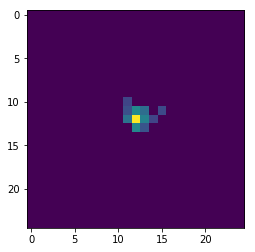

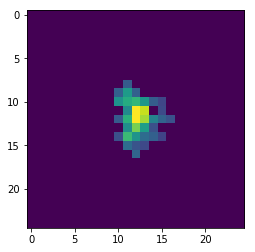

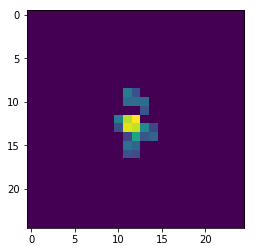

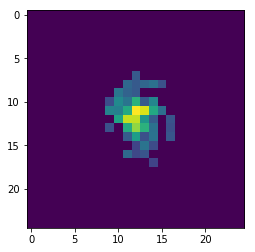

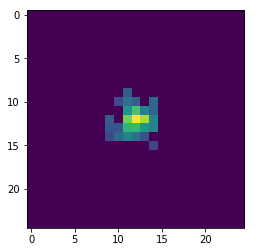

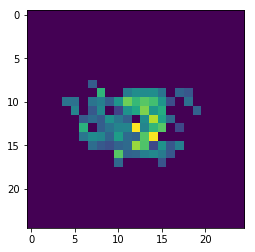

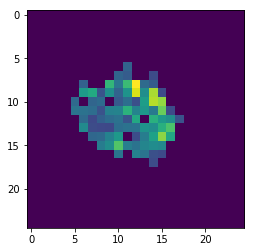

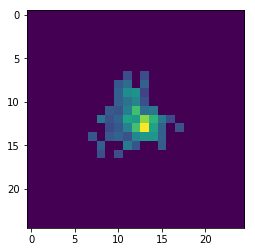

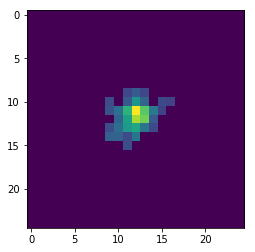

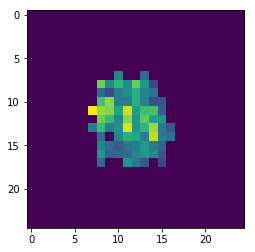

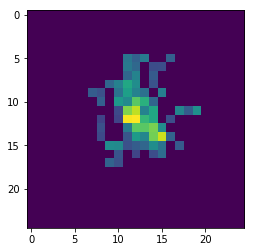

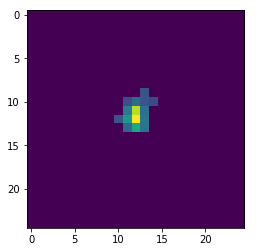

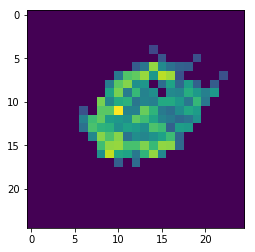

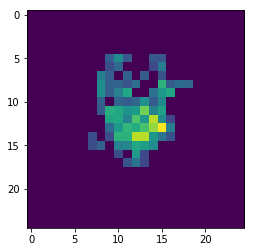

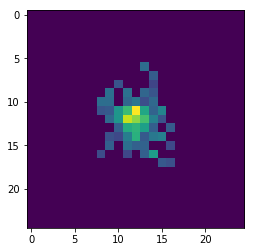

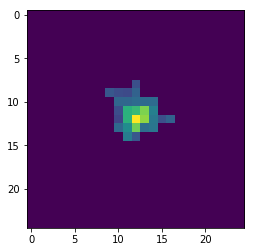

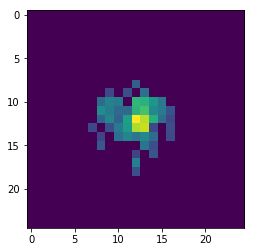

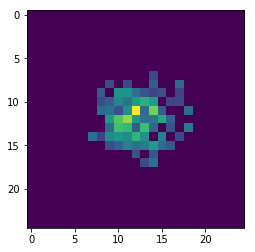

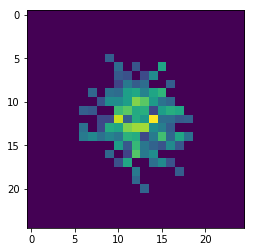

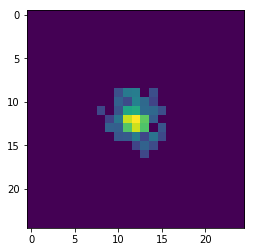

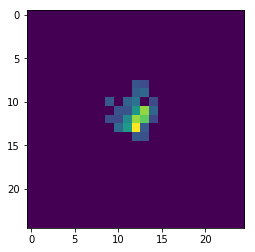

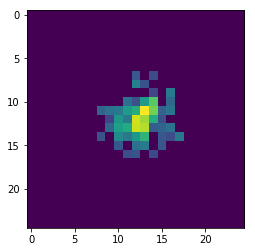

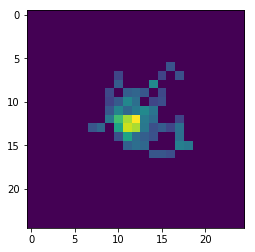

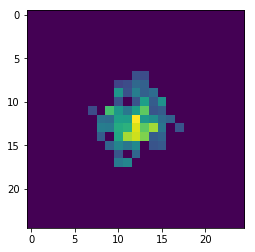

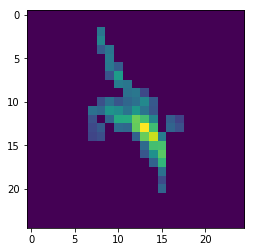

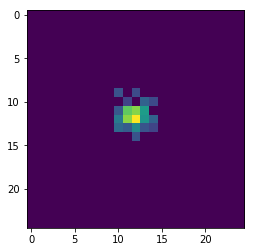

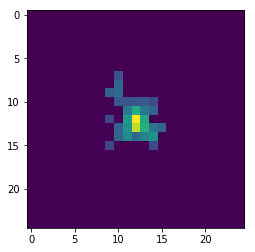

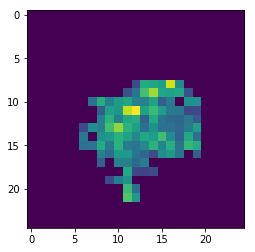

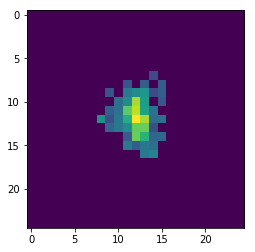

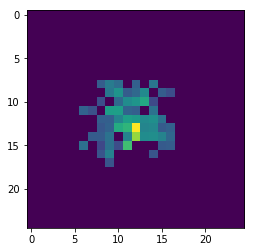

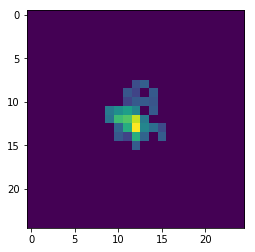

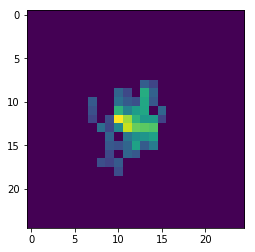

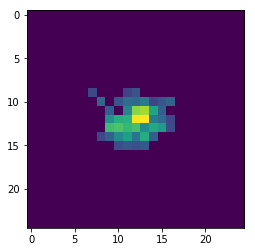

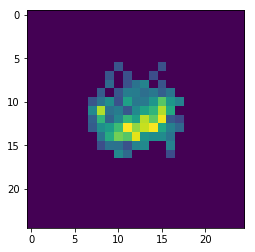

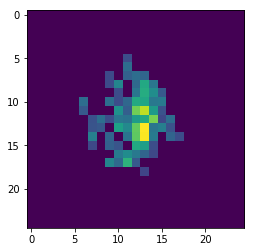

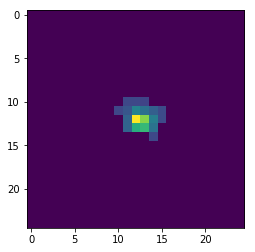

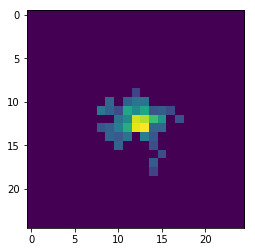

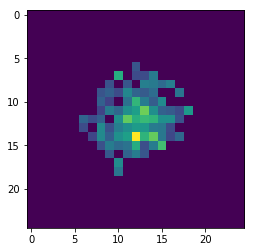

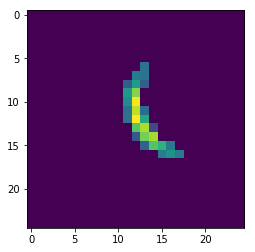

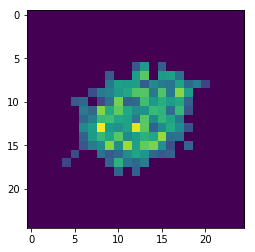

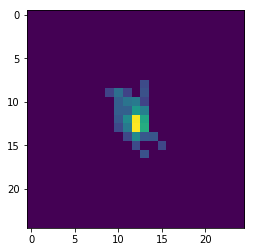

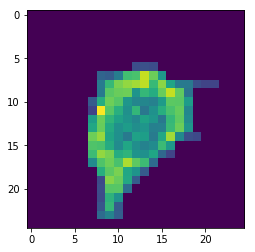

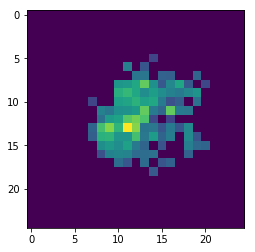

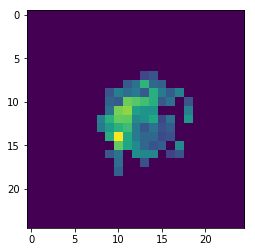

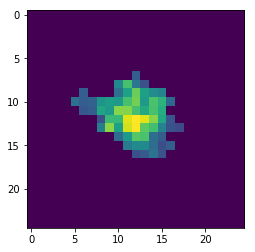

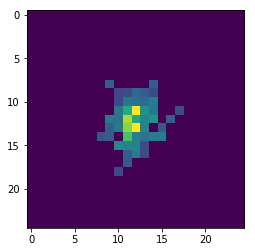

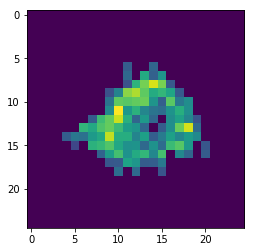

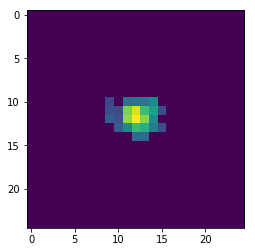

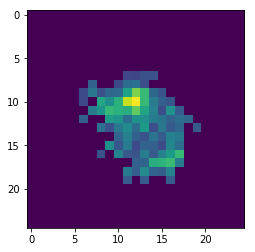

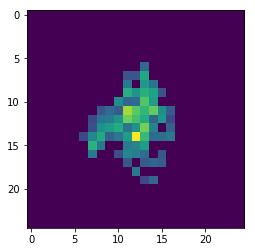

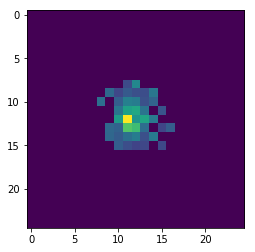

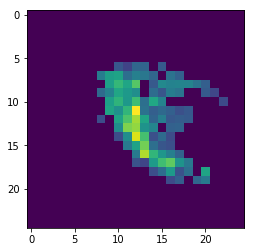

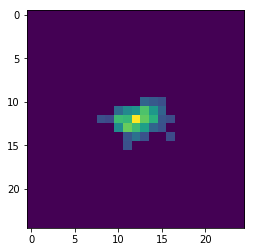

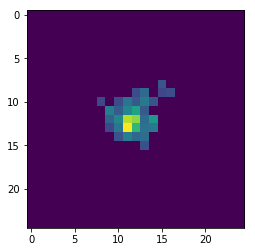

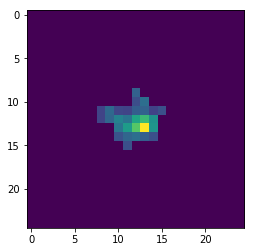

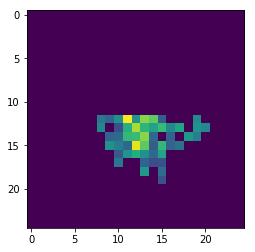

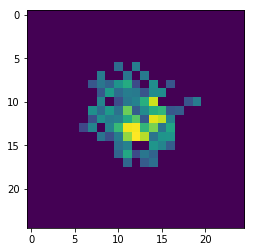

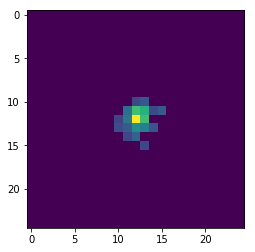

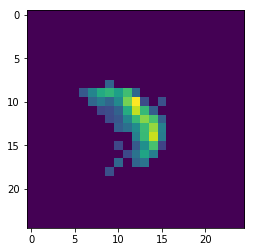

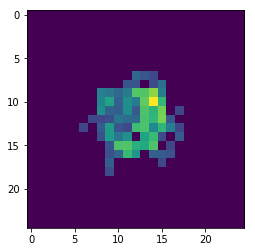

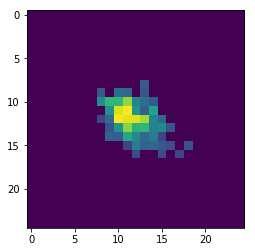

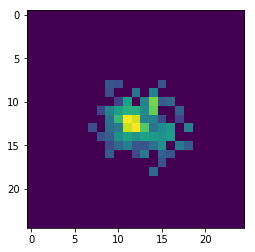

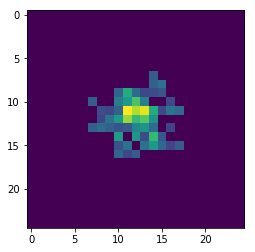

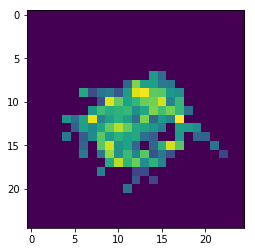

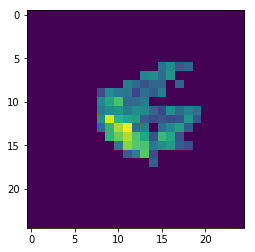

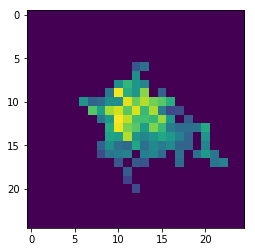

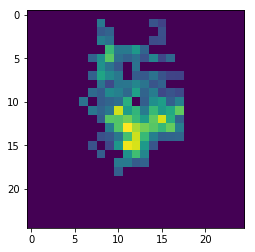

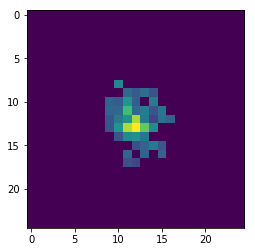

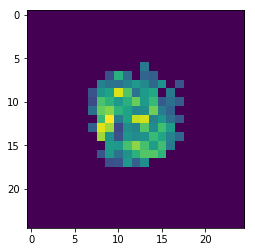

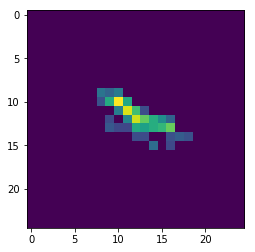

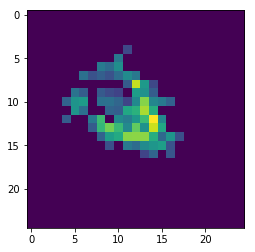

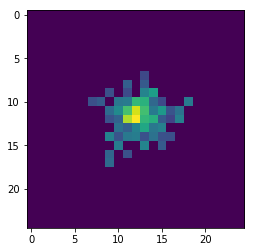

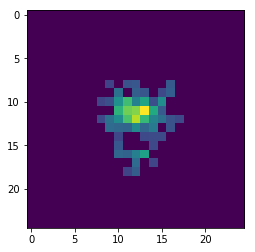

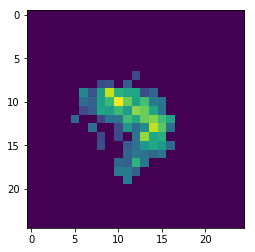

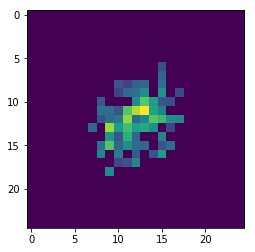

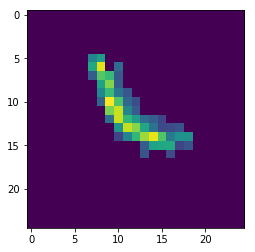

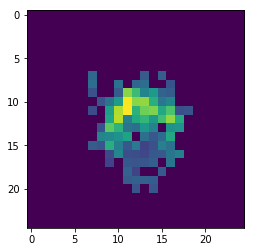

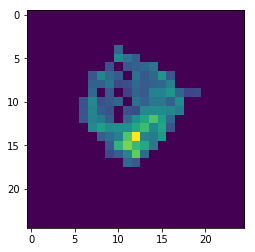

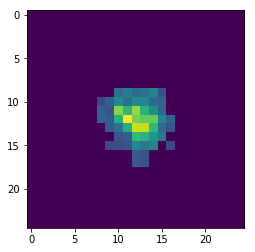

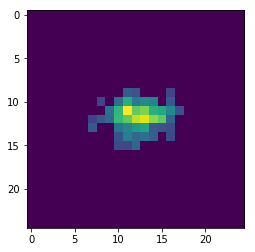

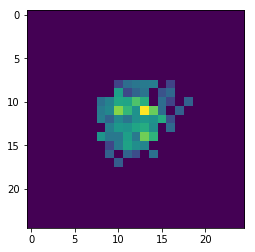

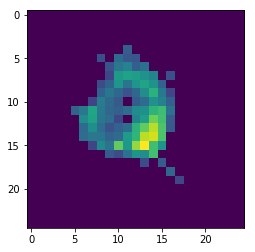

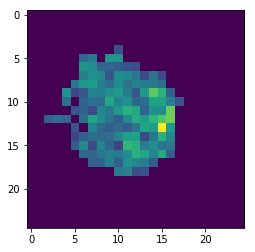

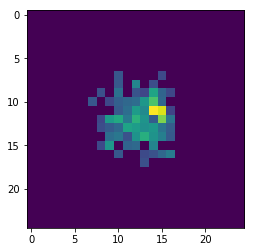

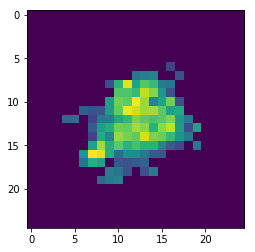

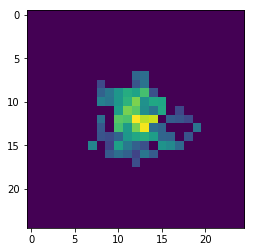

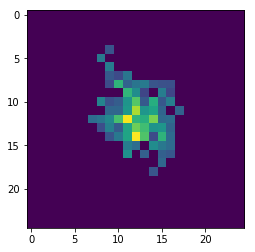

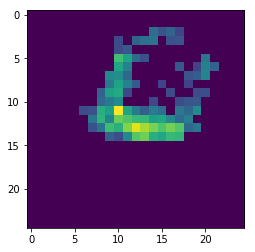

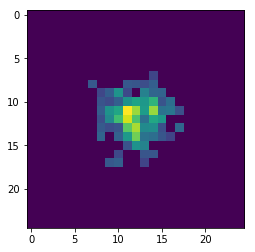

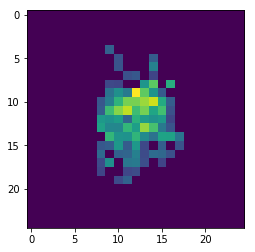

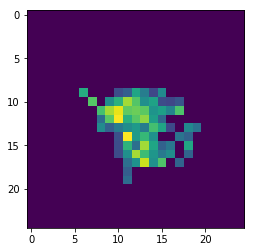

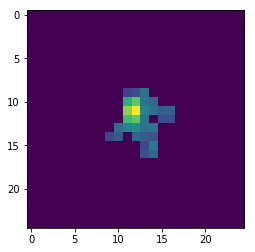

In [220]:
print(ncells)
for n in range(0,100):
    mLamOut = mLam[:,n]
    mLam2 = np.zeros(rsmall.shape)
    mLam2[rsmall<=d0] = mLamOut

    plt.imshow(mLam2)
    plt.show()

In [ ]:
# reestimate masks
L = sparse.lil_matrix((Ly*Lx,icell), dtype=float32)
for n in range(0,icell):
    

In [37]:
#print(Ucell.shape)
#print(Ucell[0, xc, yc])
#print(Ucell[0,xc[2],yc[2]])
#plt.imshow(imax[-50:,-50:])
#plt.plot(yc,xc,'o')
#plt.show()
n = 0
# get connected region
    
n = 1


In [64]:
from scipy import signal
import imp

import myutils
imp.reload(myutils)

s1 = np.reshape(S[100:103,:],(3,Ly,Lx))
s1 = np.transpose(s1[:,1:500,:],(1,2,0))
#s1 = s1[:,0:500,:]

print(s1.shape)

sig = 60

sfilt = myutils.conv2(s1,50.0,[1,2])    
print(type(sfilt))

(499, 512, 3)
(512, 499, 3)
(400, 1, 1)
(911, 499, 3)
[1 0 2]
(3, 499, 512)
(400, 1, 1)
(402, 499, 512)
[1 2 0]
<class 'numpy.ndarray'>


(499, 512, 3)


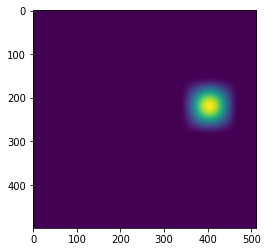

In [65]:

plt.imshow(s1[:,:,1])
print(sfilt.shape)


In [76]:


sfilt = filters.gaussian_filter(s1, [0., 2., 2.],  mode='reflect')
    

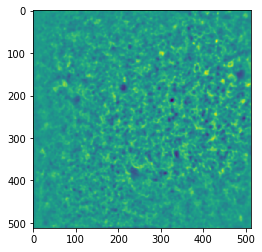

In [78]:
plt.imshow(sfilt[0,:,:])